# Problem 4

### In this notebook I would like to highlight my visualization, machine learning, and data analysis skills as well as my work using neural networks to perform image classification.

### The goal of this problem was to create a model that could accurately classify the images that were presented to it (see below).

In [1]:
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
batch_size = 256
nb_classes = 10
nb_epoch = 16

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 36
# size of pooling area for max pooling
pool_size = (3, 3)
# convolution kernel size
kernel_size = 3 #(3, 3)

In [4]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols,1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
input_shape = (img_rows, img_cols,1)

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [8]:
Y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

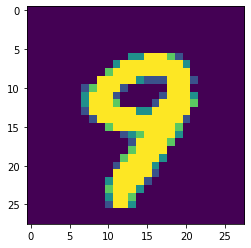

In [9]:
plt.imshow(X_train[5999][:,:,:]);

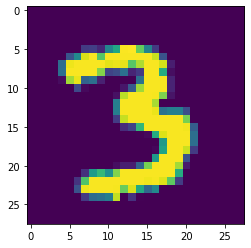

In [10]:
plt.imshow(X_test[500][:,:,:]);

In [11]:
# Creating Model that is different than class example

In [ ]:
def reset_weights(model):
	"""This function re-initializes model weights at each compile"""
	for layer in model.layers: 
		if isinstance(layer, tf.keras.Model):
			reset_weights(layer)
			continue
	for k, initializer in layer.__dict__.items():
		if "initializer" not in k:
			continue
		# find the corresponding variable
		var = getattr(layer, k.replace("_initializer", ""))
		var.assign(initializer(var.shape, var.dtype))


In [12]:
model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size,
                        padding='same',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [13]:
# train model
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test))

Epoch 1/16
235/235 [==============================] - 34s 144ms/step - loss: 2.3096 - accuracy: 0.1074 - val_loss: 2.2834 - val_accuracy: 0.1640
Epoch 2/16
235/235 [==============================] - 35s 147ms/step - loss: 2.2947 - accuracy: 0.1246 - val_loss: 2.2649 - val_accuracy: 0.2026
Epoch 3/16
235/235 [==============================] - 35s 148ms/step - loss: 2.2772 - accuracy: 0.1435 - val_loss: 2.2464 - val_accuracy: 0.2662
Epoch 4/16
235/235 [==============================] - 35s 147ms/step - loss: 2.2626 - accuracy: 0.1610 - val_loss: 2.2278 - val_accuracy: 0.3493
Epoch 5/16
235/235 [==============================] - 34s 145ms/step - loss: 2.2456 - accuracy: 0.1846 - val_loss: 2.2085 - val_accuracy: 0.4085
Epoch 6/16
235/235 [==============================] - 34s 145ms/step - loss: 2.2287 - accuracy: 0.2046 - val_loss: 2.1882 - val_accuracy: 0.4668
Epoch 7/16
235/235 [==============================] - 34s 146ms/step - loss: 2.2121 - accuracy: 0.2239 - val_loss: 2.1668 - val_ac

In [14]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 1.8624216318130493
Test accuracy: 0.7019000053405762


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 36)        360       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 36)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 36)        11700     
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 36)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 36)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 36)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

### (a)

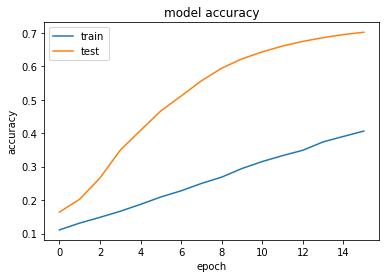

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### (b)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

In [18]:
y_pred = model.predict(X_test, batch_size=64, verbose=1)

157/157 [==============================] - 2s 12ms/step


In [19]:
y_pred_bool = np.argmax(y_pred, axis=1)

In [20]:
print(classification_report(y_test, y_pred_bool))

              precision    recall  f1-score   support

           0       0.55      0.96      0.70       980
           1       0.87      0.95      0.91      1135
           2       0.84      0.68      0.75      1032
           3       0.65      0.85      0.74      1010
           4       0.87      0.50      0.63       982
           5       0.94      0.06      0.11       892
           6       0.78      0.77      0.78       958
           7       0.78      0.82      0.80      1028
           8       0.64      0.62      0.63       974
           9       0.54      0.70      0.61      1009

    accuracy                           0.70     10000
   macro avg       0.75      0.69      0.67     10000
weighted avg       0.75      0.70      0.68     10000



### (c)

In [21]:
print(multilabel_confusion_matrix(y_test, y_pred_bool))

[[[8257  763]
  [  38  942]]

 [[8703  162]
  [  57 1078]]

 [[8834  134]
  [ 331  701]]

 [[8533  457]
  [ 151  859]]

 [[8945   73]
  [ 494  488]]

 [[9105    3]
  [ 841   51]]

 [[8832  210]
  [ 216  742]]

 [[8733  239]
  [ 182  846]]

 [[8693  333]
  [ 369  605]]

 [[8384  607]
  [ 302  707]]]


### (d) Including more dropout layers

In [22]:
model1 = Sequential()

model1.add(Convolution2D(nb_filters, kernel_size,
                        padding='same',
                        input_shape=input_shape))
model1.add(Activation('relu'))
model1.add(Convolution2D(nb_filters, kernel_size))
model1.add(Dropout(0.45))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=pool_size))
model1.add(Dropout(0.4))

model1.add(Flatten())
model1.add(Dense(128))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))
model1.add(Dense(nb_classes))
model1.add(Activation('softmax'))

model1.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

In [23]:
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test))

Epoch 1/16
235/235 [==============================] - 34s 144ms/step - loss: 1.9384 - accuracy: 0.4248 - val_loss: 1.8123 - val_accuracy: 0.7097
Epoch 2/16
235/235 [==============================] - 35s 147ms/step - loss: 1.8991 - accuracy: 0.4412 - val_loss: 1.7588 - val_accuracy: 0.7163
Epoch 3/16
235/235 [==============================] - 35s 149ms/step - loss: 1.8557 - accuracy: 0.4562 - val_loss: 1.7018 - val_accuracy: 0.7228
Epoch 4/16
235/235 [==============================] - 34s 145ms/step - loss: 1.8120 - accuracy: 0.4680 - val_loss: 1.6422 - val_accuracy: 0.7299
Epoch 5/16
235/235 [==============================] - 34s 145ms/step - loss: 1.7670 - accuracy: 0.4815 - val_loss: 1.5807 - val_accuracy: 0.7383
Epoch 6/16
235/235 [==============================] - 34s 144ms/step - loss: 1.7238 - accuracy: 0.4902 - val_loss: 1.5181 - val_accuracy: 0.7455
Epoch 7/16
235/235 [==============================] - 34s 145ms/step - loss: 1.6788 - accuracy: 0.5045 - val_loss: 1.4551 - val_ac

### After some experimentation with this dropout function, the model is definitely performing better, I used values between 0.1-0.5. It is interesting to see an improvement in the accuracy of the model, as the dropout is  randomly selected neurons to be ignored during training. This ensures that the model doesn't become too specialized to the training data. The final accuracy was 0.797 which is better than the previous model which had a test accuracy of 0.7019